In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_labels(source_dir: str, datasets: list) -> dict:

    d_labels = {}
    for dataset, n_folds in datasets:
        d_labels[dataset] = {
            "train": [],
            "test": []
        }
        for fold in np.arange(n_folds):

            labels_dir = f"{source_dir}/datasets/labels/split_{n_folds}/{dataset}/{fold}"
            d_labels[dataset]["train"].append(
                np.load(f"{labels_dir}/train.npy"))
            d_labels[dataset]["test"].append(np.load(f"{labels_dir}/test.npy"))

    return d_labels


def load_probas(source_dir: str, datasets: list, clf_set: list) -> dict:
    d_probas = {}
    # For each dataset.
    for dataset, n_folds in datasets:
        d_probas[dataset] = {}
        # For each CLF.
        for clf, proba_type in clf_set:
            # If clf not in d_probas yet.
            if clf not in d_probas:
                d_probas[dataset][clf] = {}
            # For each fold.
            for fold in np.arange(n_folds):
                probas_dir = f"{source_dir}/{proba_type}/split_{n_folds}/{dataset}/{n_folds}_folds/{clf}/{fold}"

                if f"train" not in d_probas[dataset][clf]:
                    d_probas[dataset][clf]["train"] = []
                d_probas[dataset][clf]["train"].append(
                    np.load(f"{probas_dir}/train.npz")["X_train"])

                if f"test" not in d_probas[dataset][clf]:
                    d_probas[dataset][clf]["test"] = []
                d_probas[dataset][clf]["test"].append(
                    np.load(f"{probas_dir}/test.npz")["X_test"])

            d_probas[dataset][clf]
    return d_probas


In [3]:
DATA_SOURCE = "/home/welton/data"
STACKING_DIR = f"{DATA_SOURCE}/stacking/stacking_output"

DATASETS = [["acm", 10], ["20ng", 10]]

CLFS_SET = [
    ["bert", "normal_probas"],
    ["xlnet", "normal_probas"],
    ["ktmk", "normal_probas"],
    ["ktr", "normal_probas"],
    ["lstmk", "normal_probas"],
    ["lstr", "normal_probas"],
    ["ltr", "normal_probas"]
]
CLFS_SET.sort(key=lambda x: x[0])

FEATURES_SET = [
    "centroids-ratios",
    "dist-20",
    "neigborhood",
    "probas",
    "probas-based",
    "bert"
]

FEATURES_SET.sort()
STACKING_DIR = "/home/welton/data/stacking/stacking_output"
meta_layer = "multi_output"

idx_to_clf = {idx: clf for idx, (clf, _) in enumerate(CLFS_SET)}

clf_sufix = '/'.join([ f"{c[0]}_{c[1]}" for c in CLFS_SET ])
mf_sufix = '_'.join(FEATURES_SET)

clf_sufix, mf_sufix


('bert_normal_probas/ktmk_normal_probas/ktr_normal_probas/lstmk_normal_probas/lstr_normal_probas/ltr_normal_probas/xlnet_normal_probas',
 'bert_centroids-ratios_dist-20_neigborhood_probas_probas-based')

In [4]:
loader = np.load("/home/welton/data/stacking/stacking_output/20ng/10_folds/logistic_regression/normal_probas/bert_normal_probas/ktmk_normal_probas/ktr_normal_probas/lstmk_normal_probas/lstr_normal_probas/ltr_normal_probas/xlnet_normal_probas/fold_0/probas.npz")

In [5]:
loader["X_test"]

array([[9.93583476e-01, 2.51533530e-06, 5.23291927e-07, ...,
        1.95464606e-06, 2.52542119e-06, 8.73921537e-06],
       [9.97021204e-01, 4.36390557e-06, 1.35010363e-07, ...,
        1.25231543e-06, 1.05154129e-06, 5.18531029e-05],
       [8.73363504e-04, 1.52464354e-03, 3.30174300e-03, ...,
        8.58387521e-02, 1.13968593e-02, 2.73492078e-02],
       ...,
       [3.59708657e-05, 2.46050560e-09, 2.47727189e-05, ...,
        3.87354194e-05, 8.15970349e-08, 9.99635864e-01],
       [5.17700654e-05, 3.52579169e-08, 2.76497548e-06, ...,
        2.21418930e-05, 1.87321017e-07, 9.98438798e-01],
       [3.25662684e-05, 5.16250792e-08, 3.30726863e-06, ...,
        7.39912890e-06, 1.00972124e-07, 9.98663139e-01]])

In [6]:
dataset_labels = load_labels(DATA_SOURCE, DATASETS)
dataset_labels

{'acm': {'train': [array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0])],
  'test': [array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0]),
   array([6, 6, 6, ..., 0, 0, 0])]},
 '20ng': {'train': [array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([

In [7]:
dataset_labels["acm"]["train"][9]

array([6, 6, 6, ..., 0, 0, 0])

In [8]:
dataset_probas = load_probas(DATA_SOURCE, DATASETS, CLFS_SET)
dataset_probas

{'acm': {'bert': {'train': [array([[3.80646525e-04, 2.23862327e-04, 5.05161355e-04, ...,
            9.96009946e-01, 9.19798797e-04, 8.63446548e-05],
           [5.54583967e-04, 1.92215492e-03, 1.64117897e-04, ...,
            2.10435037e-03, 8.56313854e-04, 5.09782170e-04],
           [5.40047826e-04, 4.26604971e-03, 5.93790086e-04, ...,
            5.20683534e-04, 8.31513316e-04, 7.69515987e-04],
           ...,
           [8.35606176e-03, 4.03912854e-04, 1.94572215e-03, ...,
            6.73655048e-03, 5.54425549e-03, 1.81752928e-02],
           [7.89968073e-01, 3.60274664e-03, 4.40154364e-03, ...,
            9.24421009e-03, 5.99299883e-03, 3.98382358e-02],
           [1.93230808e-02, 1.97296101e-03, 4.10539005e-03, ...,
            4.01126534e-01, 1.65007431e-02, 2.17414778e-02]]),
    array([[3.64439649e-04, 2.68781179e-04, 3.17249418e-04, ...,
            9.95675862e-01, 1.43783912e-03, 1.30459026e-04],
           [1.67665421e-03, 2.41610850e-03, 4.19876305e-04, ...,
           

In [9]:
dataset_probas["acm"]["bert"]["train"][0]

array([[3.80646525e-04, 2.23862327e-04, 5.05161355e-04, ...,
        9.96009946e-01, 9.19798797e-04, 8.63446548e-05],
       [5.54583967e-04, 1.92215492e-03, 1.64117897e-04, ...,
        2.10435037e-03, 8.56313854e-04, 5.09782170e-04],
       [5.40047826e-04, 4.26604971e-03, 5.93790086e-04, ...,
        5.20683534e-04, 8.31513316e-04, 7.69515987e-04],
       ...,
       [8.35606176e-03, 4.03912854e-04, 1.94572215e-03, ...,
        6.73655048e-03, 5.54425549e-03, 1.81752928e-02],
       [7.89968073e-01, 3.60274664e-03, 4.40154364e-03, ...,
        9.24421009e-03, 5.99299883e-03, 3.98382358e-02],
       [1.93230808e-02, 1.97296101e-03, 4.10539005e-03, ...,
        4.01126534e-01, 1.65007431e-02, 2.17414778e-02]])

In [10]:
dataset_preds = {}
for dataset, n_folds in DATASETS:
    dataset_preds[dataset] = {}
    for clf in dataset_probas[dataset]:
        dataset_preds[dataset][clf] = {
            "train": [],
            "test": []
        }
        for fold in np.arange(n_folds):
            dataset_preds[dataset][clf]["train"].append(dataset_probas[dataset][clf]["train"][fold].argmax(axis=1))
            dataset_preds[dataset][clf]["test"].append(dataset_probas[dataset][clf]["test"][fold].argmax(axis=1))
dataset_preds

{'acm': {'bert': {'train': [array([8, 6, 6, ..., 7, 0, 3]),
    array([8, 6, 6, ..., 0, 7, 3]),
    array([8, 6, 6, ..., 7, 0, 8]),
    array([8, 6, 6, ..., 0, 7, 0]),
    array([8, 6, 6, ..., 7, 0, 3]),
    array([6, 6, 6, ..., 7, 0, 3]),
    array([8, 6, 6, ..., 7, 0, 3]),
    array([8, 6, 6, ..., 7, 0, 3]),
    array([8, 6, 6, ..., 0, 0, 8]),
    array([8, 6, 6, ..., 7, 0, 3])],
   'test': [array([6, 6, 6, ..., 7, 0, 0]),
    array([6, 8, 1, ..., 0, 0, 0]),
    array([6, 6, 5, ..., 7, 0, 3]),
    array([6, 6, 8, ..., 3, 0, 3]),
    array([ 6,  6,  6, ...,  0,  0, 10]),
    array([8, 6, 5, ..., 7, 0, 0]),
    array([6, 6, 6, ..., 1, 0, 0]),
    array([ 6,  6,  6, ...,  3, 10,  0]),
    array([8, 6, 6, ..., 0, 0, 7]),
    array([6, 6, 6, ..., 7, 2, 0])]},
  'ktmk': {'train': [array([8, 6, 6, ..., 3, 0, 8]),
    array([8, 6, 6, ..., 0, 7, 8]),
    array([8, 6, 6, ..., 7, 0, 8]),
    array([8, 6, 6, ..., 0, 3, 0]),
    array([8, 6, 6, ..., 3, 0, 8]),
    array([6, 6, 6, ..., 3, 0, 8]),


In [11]:
Counter([1,1,2,1,2,3,4,3,4,3,2,1,1]).most_common()

[(1, 5), (2, 3), (3, 3), (4, 2)]

In [12]:
agreement = {}
for dataset, n_folds in DATASETS:
    agreement[dataset] = {
        "train": [],
        "test": []
    }
    for fold in np.arange(n_folds):
        group_preds = []
        for clf in dataset_probas[dataset]:
            group_preds.append(
                dataset_preds[dataset][clf]["test"][fold]
            )
        group_preds = np.vstack(group_preds).T
        
        agreement[dataset]["test"].append(
            [ Counter(doc_preds).most_common()[0][1] for doc_preds in group_preds ]
        )
agreement

{'acm': {'train': [],
  'test': [[7,
    7,
    5,
    7,
    7,
    7,
    7,
    7,
    7,
    5,
    7,
    7,
    3,
    6,
    5,
    7,
    7,
    5,
    3,
    3,
    7,
    7,
    7,
    4,
    4,
    4,
    4,
    5,
    6,
    5,
    7,
    3,
    7,
    4,
    7,
    7,
    7,
    4,
    7,
    7,
    6,
    6,
    7,
    7,
    6,
    6,
    2,
    7,
    7,
    4,
    7,
    7,
    6,
    7,
    3,
    7,
    2,
    7,
    7,
    7,
    3,
    7,
    7,
    7,
    7,
    4,
    7,
    6,
    6,
    7,
    7,
    6,
    7,
    6,
    7,
    5,
    3,
    7,
    7,
    4,
    7,
    7,
    7,
    4,
    7,
    7,
    3,
    4,
    4,
    7,
    7,
    3,
    7,
    4,
    4,
    4,
    2,
    4,
    4,
    6,
    5,
    6,
    5,
    7,
    6,
    7,
    4,
    7,
    4,
    5,
    7,
    7,
    7,
    3,
    7,
    4,
    4,
    6,
    7,
    4,
    4,
    6,
    7,
    7,
    7,
    3,
    5,
    5,
    7,
    7,
    5,
    3,
    4,
    7,
    4,
    6,
    7,
    7,
    

In [13]:
stacking_preds = {}
for dataset, n_folds in DATASETS:
    stacking_preds[dataset] = {"test": []}
    for fold in np.arange(n_folds):
        stacking_preds[dataset]["test"].append(
            np.load(f"{STACKING_DIR}/{dataset}/{n_folds}_folds/logistic_regression/normal_probas/{clf_sufix}/fold_{fold}/probas.npz")["X_test"].argmax(axis=1)
        )
stacking_preds

{'acm': {'test': [array([6, 6, 6, ..., 7, 0, 0]),
   array([6, 8, 6, ..., 0, 0, 0]),
   array([6, 6, 5, ..., 7, 0, 3]),
   array([6, 6, 8, ..., 3, 0, 3]),
   array([ 6,  6,  6, ...,  8,  0, 10]),
   array([8, 6, 5, ..., 7, 0, 0]),
   array([6, 6, 6, ..., 1, 0, 0]),
   array([ 6,  6,  6, ...,  7, 10,  0]),
   array([8, 6, 6, ..., 0, 0, 7]),
   array([6, 3, 6, ..., 7, 2, 0])]},
 '20ng': {'test': [array([ 0,  0, 11, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0, 13, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0, 19, ..., 19, 19, 19]),
   array([ 0,  0,  5, ..., 19, 19, 19]),
   array([ 0,  0,  0, ..., 19, 19, 19]),
   array([ 0,  0, 13, ..., 19, 19, 19])]}}

In [14]:
stacking_hits = {}
for dataset, n_folds in DATASETS:
    stacking_hits[dataset] = {"test": []}
    for fold in np.arange(n_folds):
        diff = stacking_preds[dataset]["test"][fold] == dataset_labels[dataset]["test"][fold]
        stacking_hits[dataset]["test"].append(
            diff
        )
stacking_hits

{'acm': {'test': [array([ True,  True,  True, ..., False,  True,  True]),
   array([ True, False,  True, ...,  True,  True,  True]),
   array([ True,  True, False, ..., False,  True, False]),
   array([ True,  True, False, ..., False,  True, False]),
   array([ True,  True,  True, ..., False,  True, False]),
   array([False,  True, False, ..., False,  True,  True]),
   array([ True,  True,  True, ..., False,  True,  True]),
   array([ True,  True,  True, ..., False, False,  True]),
   array([False,  True,  True, ...,  True,  True, False]),
   array([ True, False,  True, ..., False, False,  True])]},
 '20ng': {'test': [array([ True,  True, False, ...,  True,  True,  True]),
   array([ True,  True,  True, ...,  True,  True,  True]),
   array([ True,  True, False, ...,  True,  True,  True]),
   array([ True,  True,  True, ...,  True,  True,  True]),
   array([ True,  True,  True, ...,  True,  True,  True]),
   array([ True,  True,  True, ...,  True,  True,  True]),
   array([ True,  True,

In [15]:
def get_cdf(values: np.ndarray):

    counts = pd.Series(values).value_counts()
    keys = list(counts.keys())
    keys.sort()
    acc = 0
    cdf = []
    total = np.sum(counts.values)
    for key in keys:
        acc += counts[key] / total
        cdf.append(acc)
    return keys, cdf

def format(title: str, xlabel: str, ylabel: str):

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

def plot_bar(values: np.ndarray, title: str, xlabel: str, ylabel: str):

    counts = pd.Series(values).value_counts()
    keys = list(counts.keys())
    keys.sort()
    y = [ counts[key] for key in keys ]
    plt.bar(keys, y)
    format(title, xlabel, ylabel)
    

def plot_cdf(values: np.ndarray, title: str, xlabel: str, ylabel: str):

    keys, cdf = get_cdf(values)
    plt.plot(keys, cdf)
    plt.grid()
    format(title, xlabel, ylabel)


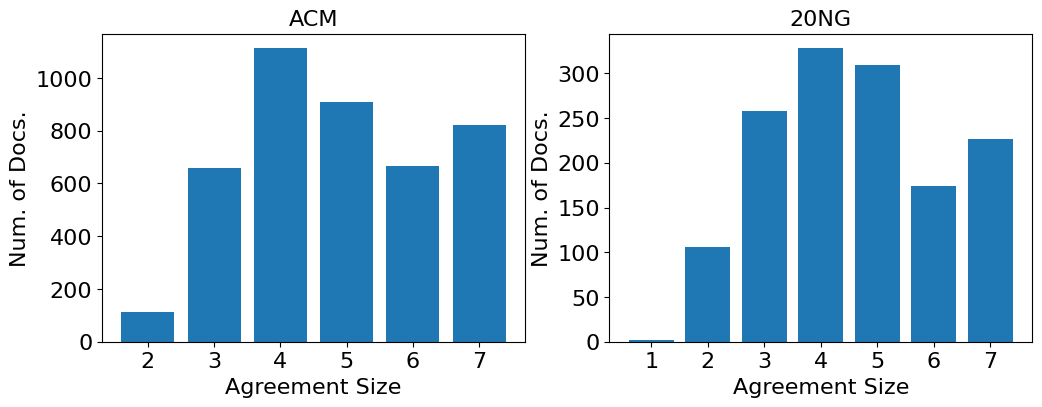

In [16]:
plt.figure(figsize=(12, 4))
for pidx, (dataset, n_folds) in enumerate(DATASETS):
    counts = []
    for fold in np.arange(n_folds):
        missed = ~stacking_hits[dataset]["test"][fold]
        counts.append(
            np.array(agreement[dataset]["test"][fold])[missed]
        )
    counts = np.hstack(counts)
    plt.subplot(1, 2, pidx + 1)
    plot_bar(counts, dataset.upper(), "Agreement Size", "Num. of Docs.")

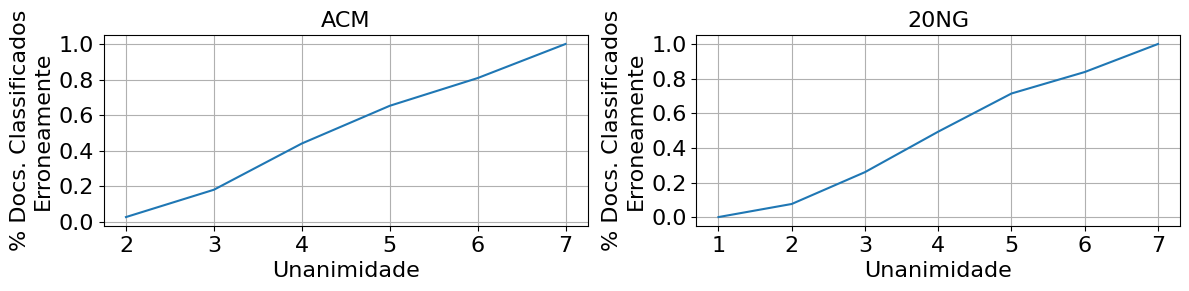

In [18]:
plt.figure(figsize=(12, 3))
for pidx, (dataset, n_folds) in enumerate(DATASETS):
    counts = []
    for fold in np.arange(n_folds):
        missed = ~stacking_hits[dataset]["test"][fold]
        counts.append(
            np.array(agreement[dataset]["test"][fold])[missed]
        )
    counts = np.hstack(counts)
    plt.subplot(1, 2, pidx + 1)
    plot_cdf(counts, dataset.upper(), "Unanimidade", "% Docs. Classificados\nErroneamente")
plt.tight_layout()
plt.savefig("charts/cdf_mjb.pdf")